## DIABETES

## IMPORTING LIBRARIES

In [413]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

## Data Loading

In [414]:
df = pd.read_csv("diabetes.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [415]:
df1 = pd.concat((df[df['diabetes'] != 1][:11500],df[df['diabetes'] != 0]),axis=0)
df1 = df1.reset_index().drop('index',axis=1)
df1

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
19995,Female,65.0,1,1,never,33.55,8.2,140,1
19996,Male,55.0,0,1,former,30.42,6.2,300,1
19997,Female,61.0,0,0,No Info,34.45,6.5,280,1
19998,Female,58.0,1,0,never,38.31,7.0,200,1


In [416]:
data = df1.drop("diabetes",axis=1)
labels = df1.loc[:,"diabetes"]

## EDA

In [417]:
data.shape

(20000, 8)

In [418]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,48.998882,0.139050,0.079400,29.058218,6.042200,158.71385
std,21.966022,0.346007,0.270369,7.317587,1.275871,55.48049
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.00000
25%,33.000000,0.000000,0.000000,25.410000,5.700000,126.00000
50%,52.000000,0.000000,0.000000,27.320000,6.100000,155.00000
75%,66.000000,0.000000,0.000000,32.240000,6.600000,160.00000
max,80.000000,1.000000,1.000000,88.720000,9.000000,300.00000


In [419]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               20000 non-null  object 
 1   age                  20000 non-null  float64
 2   hypertension         20000 non-null  int64  
 3   heart_disease        20000 non-null  int64  
 4   smoking_history      20000 non-null  object 
 5   bmi                  20000 non-null  float64
 6   HbA1c_level          20000 non-null  float64
 7   blood_glucose_level  20000 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 1.2+ MB


In [420]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
dtype: int64

([<matplotlib.patches.Wedge at 0x234d956db90>,
 [Text(-0.25678986018396516, 1.0696069220544058, '0'),
  Text(0.25678986018396527, -1.0696069220544058, '1')],
 [Text(-0.140067196463981, 0.5834219574842213, '57%'),
  Text(0.14006719646398103, -0.5834219574842212, '43%')])

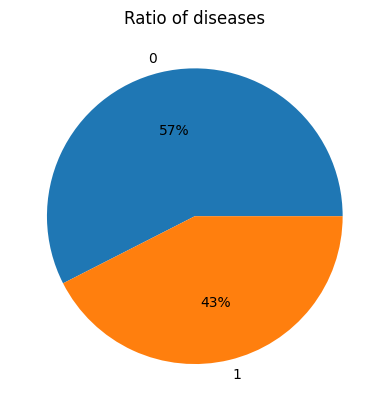

In [421]:
counts = labels.value_counts().to_dict()
plt.title("Ratio of diseases")
plt.pie([i for i in counts.values()],labels=[i for i in counts.keys()],autopct='%.0f%%')

In [422]:
enc = LabelEncoder()
cols_to_encode = ['gender','smoking_history']
for i in cols_to_encode:
    data[i] = enc.fit_transform(data[i])

<Axes: title={'center': 'Correlation Matrix'}>

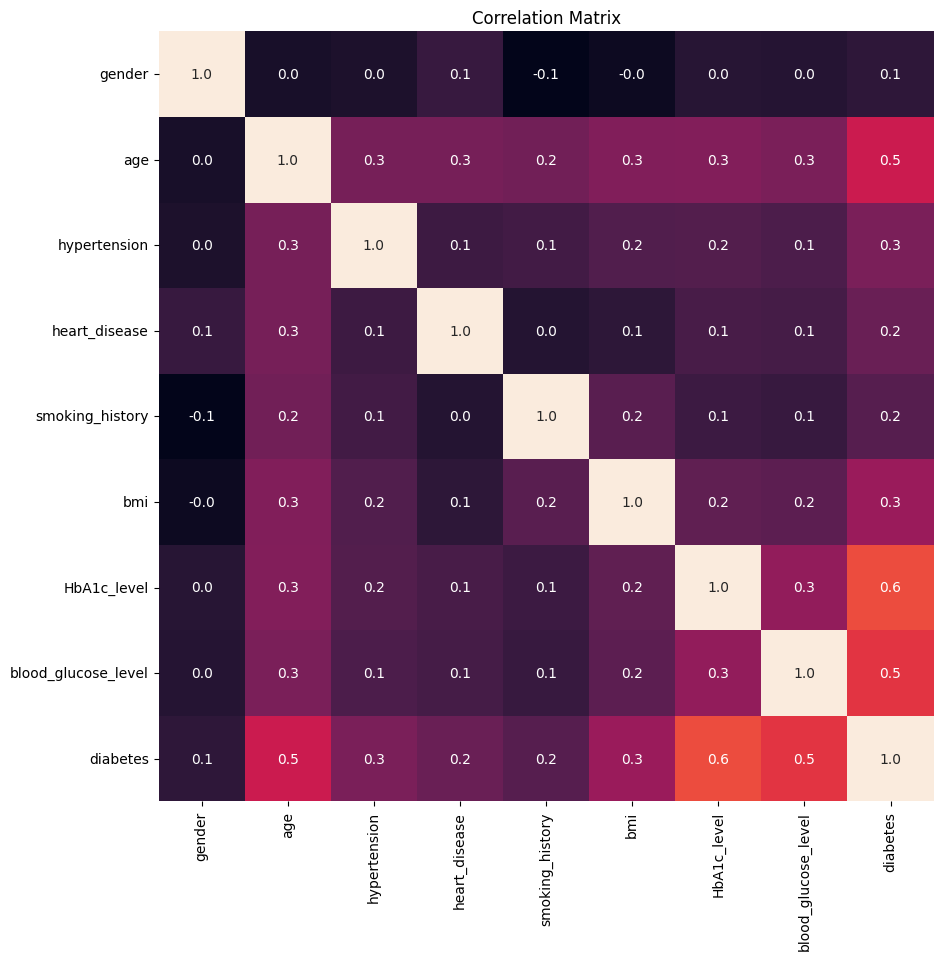

In [423]:
plt.figure(figsize=(10,10))
plt.title("Correlation Matrix")
sns.heatmap(pd.concat((data,labels),axis=1).corr(),cbar=False,annot=True,fmt=".1f")

## FEATURE ENGINEERING

In [424]:
new_features = pd.DataFrame({})
new_features['f1'] = (data['HbA1c_level'] + data['blood_glucose_level'])/data['age']
new_features['f2'] = (data['hypertension'])/data['bmi']
new_features['f3'] = (data['HbA1c_level'] ** 2)
new_features['f4'] = (data['blood_glucose_level'] ** 2)
new_features['f5'] = ((data['age'])**0.5)
data1 = pd.concat((data,new_features),axis=1)
data1

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,f1,f2,f3,f4,f5
0,0,80.0,0,1,4,25.19,6.6,140,1.832500,0.000000,43.56,19600,8.944272
1,0,54.0,0,0,0,27.32,6.6,80,1.603704,0.000000,43.56,6400,7.348469
2,1,28.0,0,0,4,27.32,5.7,158,5.846429,0.000000,32.49,24964,5.291503
3,0,36.0,0,0,1,23.45,5.0,155,4.444444,0.000000,25.00,24025,6.000000
4,1,76.0,1,1,1,20.14,4.8,155,2.102632,0.049652,23.04,24025,8.717798
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,65.0,1,1,4,33.55,8.2,140,2.280000,0.029806,67.24,19600,8.062258
19996,1,55.0,0,1,3,30.42,6.2,300,5.567273,0.000000,38.44,90000,7.416198
19997,0,61.0,0,0,0,34.45,6.5,280,4.696721,0.000000,42.25,78400,7.810250
19998,0,58.0,1,0,4,38.31,7.0,200,3.568966,0.026103,49.00,40000,7.615773


In [425]:
X_train,X_test,y_train,y_test = train_test_split(np.array(data1),labels,test_size=0.2,random_state=123)

## TRAINING

In [426]:
lr = Pipeline([
    ('scaler', StandardScaler()),               
    ('model', LogisticRegression())               
])
lr.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [427]:
print("Train Score",lr.score(X_train,y_train))
print("Test Score",lr.score(X_test,y_test))

Train Score 0.885875
Test Score 0.885


		Classification Report
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      2354
           1       0.84      0.88      0.86      1646

    accuracy                           0.89      4000
   macro avg       0.88      0.88      0.88      4000
weighted avg       0.89      0.89      0.89      4000



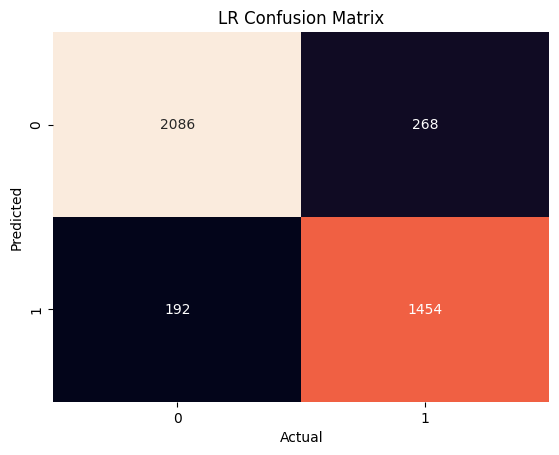

In [428]:
preds = lr.predict(X_test)
print("\t\tClassification Report\n",classification_report(preds,y_test))
plt.figure()
plt.title("LR Confusion Matrix")
sns.heatmap(confusion_matrix(preds,y_test),annot=True,cbar=False,fmt=".0f")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [429]:
knn = Pipeline([
    ('scaler', StandardScaler()),               
    ('model', KNeighborsClassifier(n_neighbors=10))               
])
knn.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=10))])

In [430]:
print("Train Score",knn.score(X_train,y_train))
print("Test Score",knn.score(X_test,y_test))

Train Score 0.909125
Test Score 0.8915


		Classification Report
               precision    recall  f1-score   support

           0       0.93      0.89      0.91      2378
           1       0.84      0.90      0.87      1622

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000



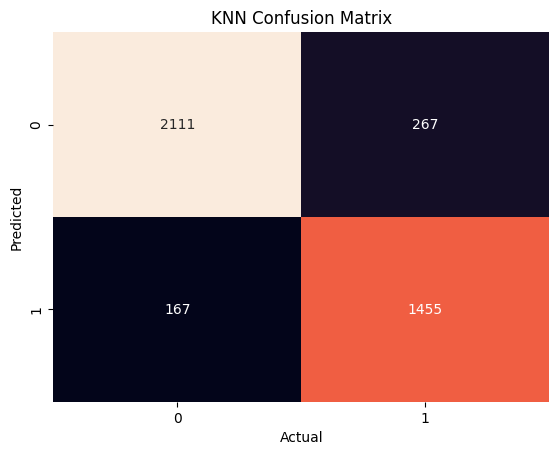

In [431]:
preds = knn.predict(X_test)
print("\t\tClassification Report\n",classification_report(preds,y_test))
plt.figure()
plt.title("KNN Confusion Matrix")
sns.heatmap(confusion_matrix(preds,y_test),annot=True,cbar=False,fmt=".0f")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [432]:
dtree = Pipeline([
    ('scaler', StandardScaler()),               
    ('model', DecisionTreeClassifier(max_depth=10,random_state=123))               
])
dtree.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(max_depth=10, random_state=123))])

In [433]:
print("Train Score",dtree.score(X_train,y_train))
print("Test Score",dtree.score(X_test,y_test))

Train Score 0.91475
Test Score 0.90025


		Classification Report
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      2329
           1       0.87      0.90      0.88      1671

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000



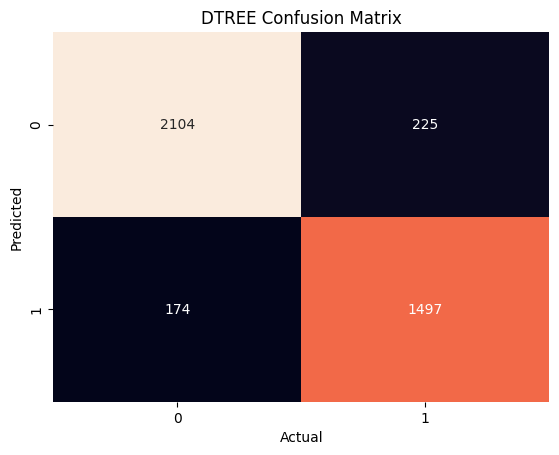

In [434]:
preds = dtree.predict(X_test)
print("\t\tClassification Report\n",classification_report(preds,y_test))
plt.figure()
plt.title("DTREE Confusion Matrix")
sns.heatmap(confusion_matrix(preds,y_test),annot=True,cbar=False,fmt=".0f")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [435]:
rf = Pipeline([
    ('scaler', StandardScaler()),               
    ('model', RandomForestClassifier(n_estimators=100,max_depth=12,random_state=123))               
])
rf.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=12, random_state=123))])

In [436]:
print("Train Score",rf.score(X_train,y_train))
print("Test Score",rf.score(X_test,y_test))

Train Score 0.9314375
Test Score 0.912


		Classification Report
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      2316
           1       0.89      0.91      0.90      1684

    accuracy                           0.91      4000
   macro avg       0.91      0.91      0.91      4000
weighted avg       0.91      0.91      0.91      4000



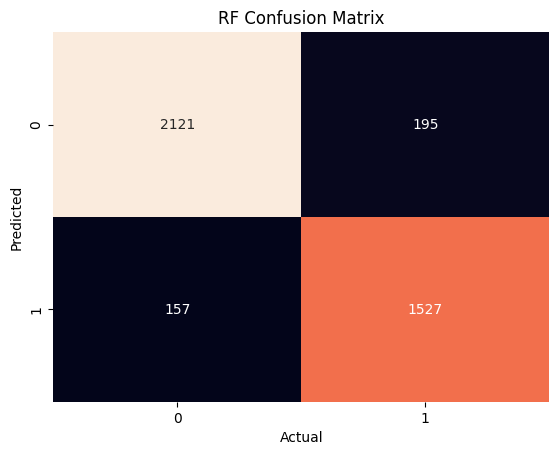

In [437]:
preds = rf.predict(X_test)
print("\t\tClassification Report\n",classification_report(preds,y_test))
plt.figure()
plt.title("RF Confusion Matrix")
sns.heatmap(confusion_matrix(preds,y_test),annot=True,cbar=False,fmt=".0f")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## SAVING MODEL

In [438]:
import pickle 
with open('RF_DIABETES.pkl','wb') as file:
    pickle.dump(rf,file)

## TESTING 

In [465]:
with open("RF_DIABETES.pkl",'rb') as file:
    model = pickle.load(file)
def prediction(gender,age,hypertension,heart_disease,smoking_history,bmi,hba1c_level,blood_glucose_level):
    f1 = (hba1c_level + blood_glucose_level)/age
    f2 = (hypertension)/bmi
    f3 = hba1c_level ** 2
    f4 = blood_glucose_level ** 2
    f5 = age ** 0.5
    x = np.array([gender,age,hypertension,heart_disease,smoking_history,bmi,hba1c_level,blood_glucose_level,f1,f2,f3,f4,f5])
    prediction = model.predict([x])
    if prediction[0] == 0:
        prediction = "Not Diabetic"
    else:
        prediction = "Diabetic"
    return prediction
prediction(0.00000000e+00, 7.10000000e+01, 0.00000000e+00, 0.00000000e+00,4.00000000e+00, 2.52100000e+01, 8.20000000e+00, 1.45000000e+02)

'Diabetic'

In [462]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [464]:
y_test

12136    1
16812    1
10072    0
5850     0
4320     0
        ..
7481     0
154      0
8627     0
4565     0
1894     0
Name: diabetes, Length: 4000, dtype: int64

In [ ]:
new_features = pd.DataFrame({})
new_features['f1'] = (data['HbA1c_level'] + data['blood_glucose_level'])/data['age']
new_features['f2'] = (data['hypertension'])/data['bmi']
new_features['f3'] = (data['HbA1c_level'] ** 2)
new_features['f4'] = (data['blood_glucose_level'] ** 2)
new_features['f5'] = ((data['age'])**0.5)
data1 = pd.concat((data,new_features),axis=1)
data1